<a href="https://colab.research.google.com/github/jnbrisset/Keras-MLP-template/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template for Multilayer Perceptron using Keras

Module imports and function declaration for plotting model performance.

In [77]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import seaborn as sns
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_theme()
sns.set_context('talk')

def plot_loss(history):

  df_loss = pd.DataFrame({
      'loss': history.history['loss'],
      'val_loss': history.history['val_loss']
    },
    index=range(1, len(history.history['loss']) + 1)
  )

  df_acc = pd.DataFrame({
      'accuracy': history.history['accuracy'],
      'val_accuracy': history.history['val_accuracy']
    },
    index=range(1, len(history.history['accuracy']) + 1)
  )

  fig, axes = plt.subplots(1, 2, figsize=(20, 8))
  fig.suptitle('Training and validation set performance')

  ax1 = sns.lineplot(ax=axes[0], data=df_loss)
  ax1.set_title('Training and validation loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')

  ax2 = sns.lineplot(ax=axes[1], data=df_acc)
  ax1.set_title('Training and validation accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')

Load training and test set here.

In [4]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Scaling strategy

In [5]:
[X_train, X_test] = np.divide([X_train, X_test], 255)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


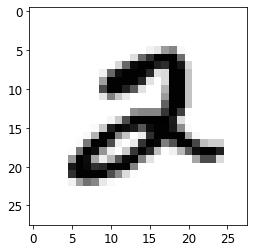

In [6]:
plt.imshow(X_train[5], cmap='binary')

In [72]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Building the neural network

In [73]:
dropout_rate = 0.15

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dropout(dropout_rate))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(dropout_rate))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(dropout_rate))
model.add(keras.layers.Dense(150, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(dropout_rate))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(dropout_rate))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               8

In [75]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [85]:
history = model.fit(X_train, Y_train, epochs=20, initial_epoch=0, batch_size=128, validation_split=0.1, use_multiprocessing=True)

Epoch 21/30
422/422 [==============================] - 5s 12ms/step - loss: 0.0260 - accuracy: 0.9914 - val_loss: 0.0532 - val_accuracy: 0.9858
Epoch 22/30
422/422 [==============================] - 5s 12ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.0664 - val_accuracy: 0.9845
Epoch 23/30
422/422 [==============================] - 5s 12ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0559 - val_accuracy: 0.9868
Epoch 24/30
422/422 [==============================] - 5s 12ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0556 - val_accuracy: 0.9870
Epoch 25/30
422/422 [==============================] - 5s 12ms/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.0583 - val_accuracy: 0.9857
Epoch 26/30
422/422 [==============================] - 5s 12ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0565 - val_accuracy: 0.9867
Epoch 27/30
422/422 [==============================] - 5s 12ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0540 - val_accuracy:

Test set performance
313/313 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9855


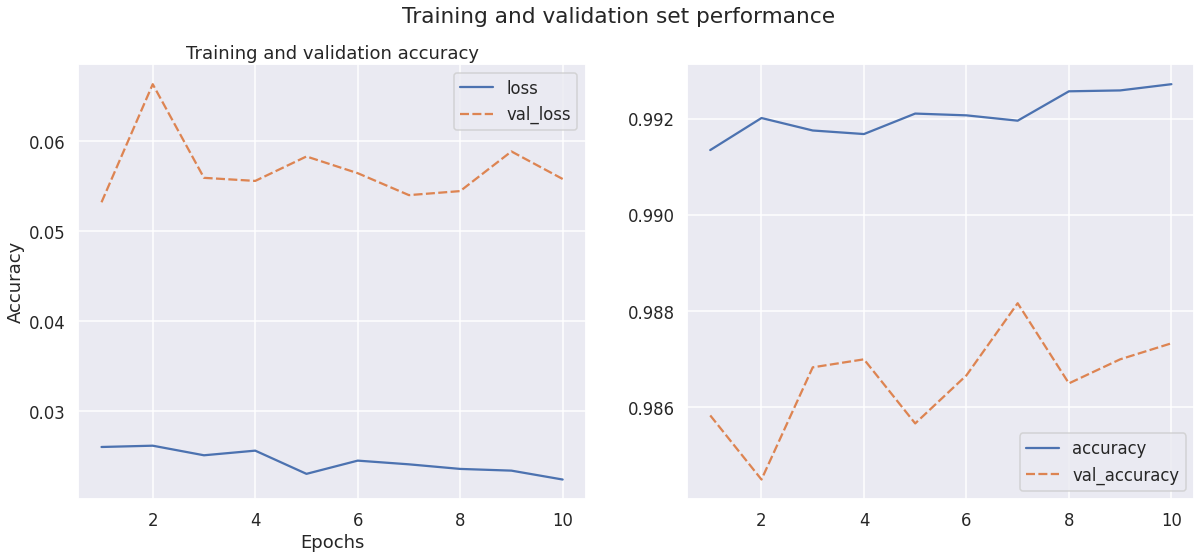

In [89]:
print('Test set performance')
test_perf = model.evaluate(X_test, Y_test)
plot_loss(history)